# <center>Diabetes Disease Detection</center>

## Overview:
Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Glucose is your body’s main source of energy. Your body can make glucose, but glucose also comes from the food you eat. Insulin is a hormone made by the pancreas that helps glucose get into your cells to be used for energy. If you have diabetes, your body doesn’t make enough—or any—insulin, or doesn’t use insulin properly. Glucose then stays in your blood and doesn’t reach your cells. Diabetes raises the risk for damage to the eyes, kidneys, nerves, and heart. Diabetes is also linked to some types of cancer.

## Dataset Information:
PIMA Indian Dataset: [Kaggle - Diabetes Disease Detection](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

### Independent Feature:
* Outcome

### Dependent Feature:
* Pregnancies	
* Glucose	
* BloodPressure	
* SkinThickness	
* Insulin	
* BMI	
* DiabetesPedigreeFunction	
* Age

### Training : Testing :: 800 : 200 :: 80 : 20

# Importing required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score


from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

# Data Ingestion

In [2]:
df = pd.read_csv('Data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data Sampling

In [3]:
df["Outcome"].value_counts()

class_0 = df[df["Outcome"]==0]
class_1 = df[df["Outcome"]==1]

In [4]:
class_0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [5]:
class_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [6]:
df_n = class_1.sample(500, replace=True)

df = pd.concat([class_0, df_n], axis=0)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
561,0,198,66,32,274,41.3,0.502,28,1
24,11,143,94,33,146,36.6,0.254,51,1
6,3,78,50,32,88,31.0,0.248,26,1
635,13,104,72,0,0,31.2,0.465,38,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 100
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   int64  
 2   BloodPressure             1000 non-null   int64  
 3   SkinThickness             1000 non-null   int64  
 4   Insulin                   1000 non-null   int64  
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   int64  
 8   Outcome                   1000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 78.1 KB


In [8]:
features = df.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,4.029000,126.113000,69.774000,20.31000,84.174000,32.754900,0.480023,33.973000,0.50000
std,3.394065,32.501147,19.210361,16.43813,121.251415,8.015706,0.349439,11.604177,0.50025
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.078000,21.000000,0.00000
25%,1.000000,102.000000,64.000000,0.00000,0.000000,27.800000,0.244000,25.000000,0.00000
50%,3.000000,123.000000,72.000000,23.00000,0.000000,32.500000,0.370000,31.000000,0.50000
75%,6.000000,147.000000,80.000000,33.00000,135.000000,36.900000,0.629250,41.000000,1.00000
max,17.000000,199.000000,122.000000,99.00000,744.000000,67.100000,2.420000,81.000000,1.00000


# Data Preprocessing

In [10]:
categorical_columns = []
numerical_columns = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

In [11]:
print("Numerical Features: ",numerical_columns)

print("\nCategorical Features: ",categorical_columns)

Numerical Features:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Categorical Features:  []


In [12]:
discrete_features=[feature for feature in numerical_columns if len(df[feature].unique())<25]
continuous_features=[feature for feature in numerical_columns if feature not in discrete_features]

In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

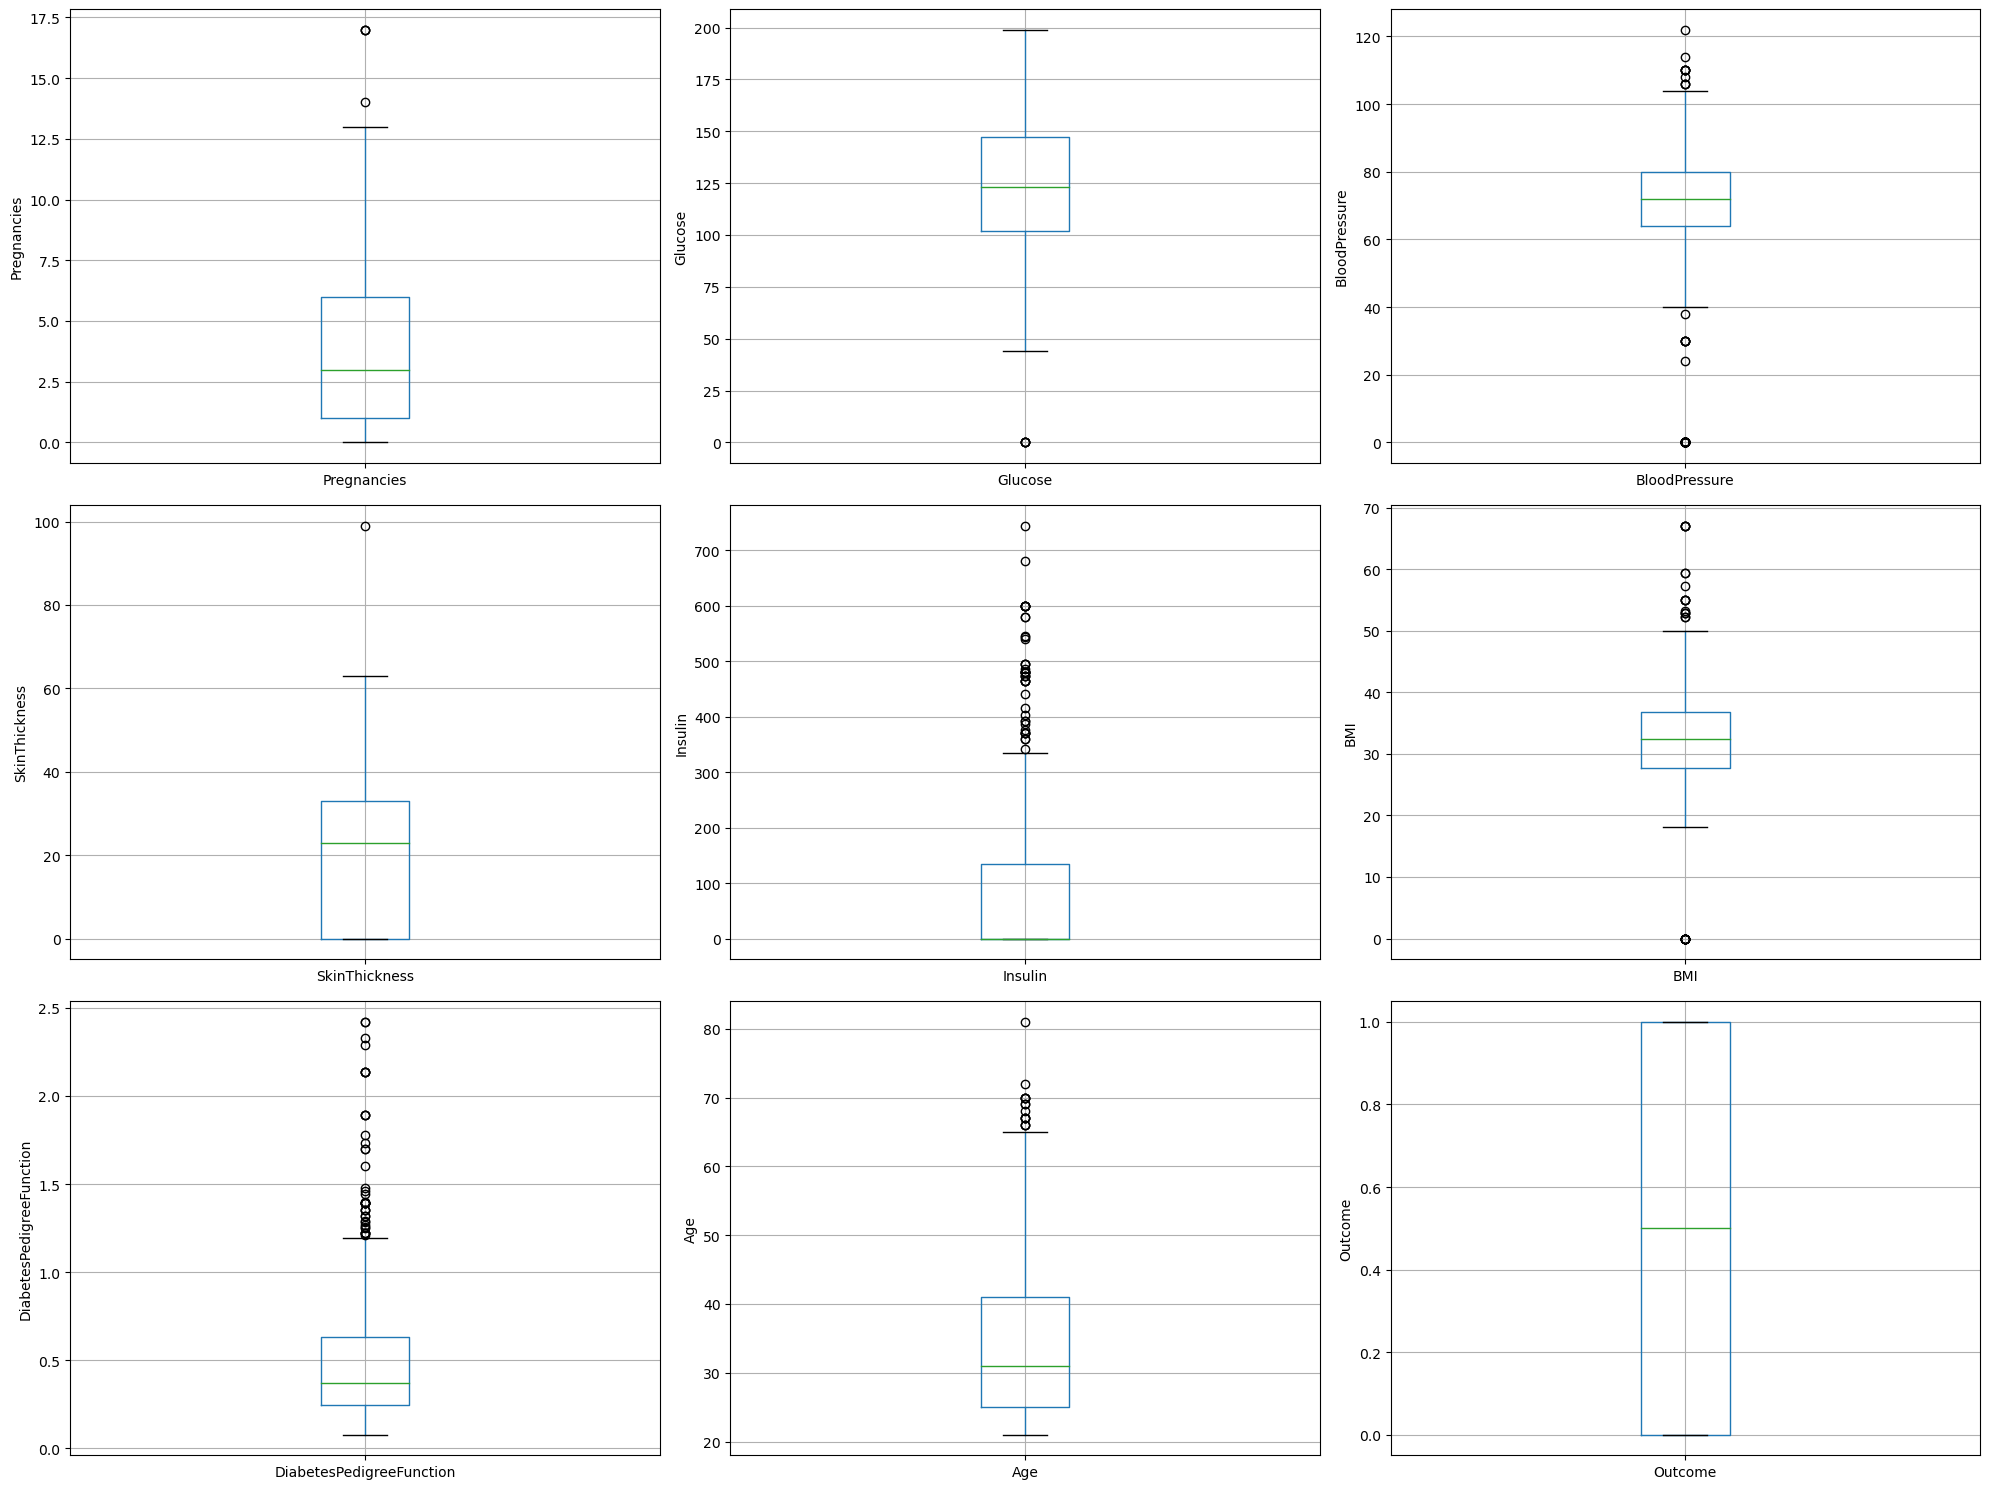

In [14]:
fig, axes = plt.subplots(3,3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes[i]
    df.boxplot(column=col, ax=ax)
    ax.set_ylabel(col)

for j in range(len(df.columns), 3,3):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [15]:
for feature in continuous_features:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_limit = df[feature].quantile(0.25) - (IQR * 3)
    upper_limit = df[feature].quantile(0.75) + (IQR * 3)
    df.loc[df[feature] >= upper_limit, feature] = upper_limit
    df.loc[df[feature] < lower_limit, feature] = lower_limit

In [16]:
x =  df.drop(columns=['Outcome'],axis=1)
y = df['Outcome']

In [17]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,1,85,66,29,0,26.6,0.351,31
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
7,10,115,16,0,0,35.3,0.134,29
10,4,110,92,0,0,37.6,0.191,30
...,...,...,...,...,...,...,...,...
561,0,198,66,32,274,41.3,0.502,28
24,11,143,94,33,146,36.6,0.254,51
6,3,78,50,32,88,31.0,0.248,26
635,13,104,72,0,0,31.2,0.465,38


In [18]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [19]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.20,random_state=40,stratify=df['Outcome'])

# Modelling

In [20]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=20, max_depth=10),
    'XG Boost': XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15, gamma=0.6, subsample=0.52, colsample_bytree=0.6, seed=27,
                              reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5),
    'K Nearest Neighbors': KNeighborsClassifier(n_neighbors=10),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6),
    'Support Vector Machine': SVC(kernel='rbf', C=2, probability=True),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier()
}

In [26]:
model_list = []
train_accuracy_list = []
test_accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for model_name, model in models.items():

    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)
    
    train_accuracy = accuracy_score(y_train,y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Training Accuracy: ",train_accuracy)
    print("Testing Accuracy: ", test_accuracy)
    print("Precision: ",precision)
    print("Recall: ",recall)
    print("F1 Score: ",f1)


    model_list.append(model_name)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    print("=" * 35)

max_accuracy_index = test_accuracy_list.index(max(test_accuracy_list))
print(f"\nThe best model based on accuracy is {model_list[max_accuracy_index]} with Testing Accuracy: {test_accuracy_list[max_accuracy_index]}")

Model: Logistic Regression
Training Accuracy:  0.755
Testing Accuracy:  0.735
Precision:  0.7281553398058253
Recall:  0.75
F1 Score:  0.7389162561576353
Model: Naive Bayes
Training Accuracy:  0.73
Testing Accuracy:  0.735
Precision:  0.7473684210526316
Recall:  0.71
F1 Score:  0.7282051282051281
Model: Random Forest Classifier
Training Accuracy:  0.9925
Testing Accuracy:  0.855
Precision:  0.8034188034188035
Recall:  0.94
F1 Score:  0.8663594470046083
Model: XG Boost
Training Accuracy:  0.84375
Testing Accuracy:  0.77
Precision:  0.7410714285714286
Recall:  0.83
F1 Score:  0.7830188679245284
Model: K Nearest Neighbors
Training Accuracy:  0.79375
Testing Accuracy:  0.745
Precision:  0.7333333333333333
Recall:  0.77
F1 Score:  0.7512195121951218
Model: Decision Tree
Training Accuracy:  0.8625
Testing Accuracy:  0.805
Precision:  0.7652173913043478
Recall:  0.88
F1 Score:  0.8186046511627908
Model: Support Vector Machine
Training Accuracy:  0.8375
Testing Accuracy:  0.77
Precision:  0.759

In [27]:
results = {
    'Model': model_list,
    'Train Accuracy': train_accuracy_list,
    'Test Accuracy': test_accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list
}

results = pd.DataFrame(results)
results

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.75500,0.735,0.728155,0.75,0.738916
1,Naive Bayes,0.73000,0.735,0.747368,0.71,0.728205
2,Random Forest Classifier,0.99250,0.855,0.803419,0.94,0.866359
3,XG Boost,0.84375,0.770,0.741071,0.83,0.783019
4,K Nearest Neighbors,0.79375,0.745,0.733333,0.77,0.751220
5,Decision Tree,0.86250,0.805,0.765217,0.88,0.818605
6,Support Vector Machine,0.83750,0.770,0.759615,0.79,0.774510
7,AdaBoost Classifier,0.84875,0.740,0.722222,0.78,0.750000
8,Gradient Boosting Classifier,0.93625,0.820,0.775862,0.90,0.833333
9,Extra Trees Classifier,1.00000,0.870,0.830357,0.93,0.877358


# Hyperparamter Tuning

In [22]:
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest Classifier': {'n_estimators': [50, 100], 'max_depth': [5, 10]},
    'XG Boost': {'learning_rate': [0.01, 0.1], 'n_estimators': [50, 100], 'max_depth': [10, 15]},
    'K Nearest Neighbors': {'n_neighbors': [5, 10, 15]},
    'Decision Tree': {'max_depth': [5, 10]},
    'Support Vector Machine': {'C': [1, 10]},
    'AdaBoost Classifier': {'n_estimators': [50, 100]},
    'Gradient Boosting Classifier': {'n_estimators': [50, 100]},
    'Extra Trees Classifier': {'n_estimators': [50, 100]}
}

In [28]:
modelss =[]
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

for model_name, model in models.items():
    if model_name in param_grid:
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, n_jobs=-1)
        
        grid_search.fit(x_train, y_train)
        best_model_cv = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"\nBest parameters for {model_name}: {best_params}")
        
        y_train_pred = best_model_cv.predict(x_train)
        y_pred = best_model_cv.predict(x_test)
        
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        modelss.append(best_model_cv)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        
        print(f"Train Accuracy for {model_name}: {train_accuracy}")
        print(f"Test Accuracy for {model_name}: {test_accuracy}")
        print(f"Precision for {model_name}: {precision}")
        print(f"Recall for {model_name}: {recall}")
        print(f"F1 Score for {model_name}: {f1}")
        print("=" * 35)

best_test_accuracy_index = test_accuracies.index(max(test_accuracies))
print(f"We got {modelss[best_test_accuracy_index]} as highest test acuracy of {test_accuracies[best_test_accuracy_index]}")


Best parameters for Logistic Regression: {'C': 0.1}
Train Accuracy for Logistic Regression: 0.7575
Test Accuracy for Logistic Regression: 0.74
Precision for Logistic Regression: 0.7352941176470589
Recall for Logistic Regression: 0.75
F1 Score for Logistic Regression: 0.7425742574257426

Best parameters for Random Forest Classifier: {'max_depth': 10, 'n_estimators': 50}
Train Accuracy for Random Forest Classifier: 0.995
Test Accuracy for Random Forest Classifier: 0.845
Precision for Random Forest Classifier: 0.7899159663865546
Recall for Random Forest Classifier: 0.94
F1 Score for Random Forest Classifier: 0.858447488584475

Best parameters for XG Boost: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Train Accuracy for XG Boost: 0.9175
Test Accuracy for XG Boost: 0.8
Precision for XG Boost: 0.7586206896551724
Recall for XG Boost: 0.88
F1 Score for XG Boost: 0.8148148148148148

Best parameters for K Nearest Neighbors: {'n_neighbors': 5}
Train Accuracy for K Nearest Neighbo

In [31]:
results1 = {
    'Model': modelss,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
}

results1 = pd.DataFrame(results1)
results1

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,LogisticRegression(C=0.1),0.75750,0.740,0.735294,0.75,0.742574
1,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.99500,0.845,0.789916,0.94,0.858447
2,"XGBClassifier(base_score=None, booster='dart',...",0.91750,0.800,0.758621,0.88,0.814815
3,KNeighborsClassifier(),0.86000,0.740,0.706897,0.82,0.759259
4,"DecisionTreeClassifier(criterion='entropy', ma...",0.96500,0.850,0.818182,0.90,0.857143
5,"SVC(C=1, probability=True)",0.82125,0.765,0.762376,0.77,0.766169
6,"(DecisionTreeClassifier(max_depth=1, random_st...",0.86375,0.710,0.690909,0.76,0.723810
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.93625,0.820,0.775862,0.90,0.833333
8,"(ExtraTreeClassifier(random_state=1672194867),...",1.00000,0.870,0.836364,0.92,0.876190


# ROC AUC Curve Representation

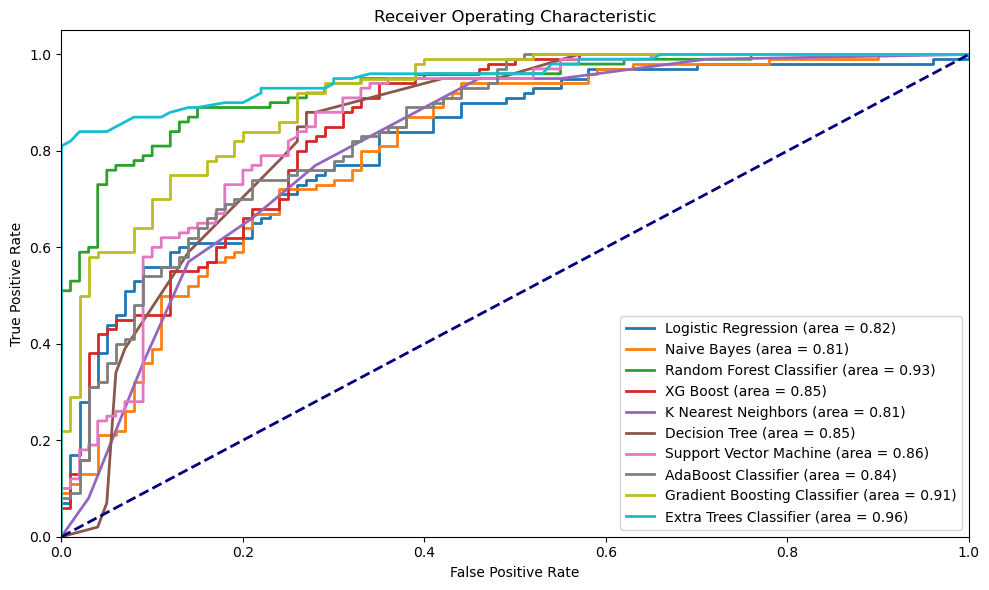

In [30]:
def plot_roc_curve(ax, y_true, y_score, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = roc_auc_score(y_true, y_score)
    ax.plot(fpr, tpr, lw=2, label='%s (area = %0.2f)' % (model_name, roc_auc))


fig, ax = plt.subplots(figsize=(10, 6))

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_score = model.predict_proba(x_test)[:, 1]
    plot_roc_curve(ax, y_test, y_score, model_name)


ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [25]:
best_model = models['Extra Trees Classifier']
pickle.dump(best_model,open('Diabetes_Model.pkl','wb'))
pickle.dump(scaler,open('Diabetes_Preprocessor.pkl','wb'))

# Model File Testing

In [32]:
import pickle

model = pickle.load(open("../Artifacts/Diabetes_Disease/Diabetes_Model.pkl", "rb"))
processor = pickle.load(open("../Artifacts/Diabetes_Disease/Diabetes_Preprocessor.pkl", "rb"))

data = processor.transform([x_train[0]])
predictions = model.predict(data)

print(predictions)

[0]
